### Fashion MNIST experiment 

In [18]:
import numpy as np
import models as ml
import matplotlib.pyplot as plt

from utils import mnist_reader

%matplotlib inline

#### 1), load data 

In [19]:
X_train, y_train = mnist_reader.load_mnist('./data/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/data/fashion', kind='t10k')

In [20]:
X_train = (X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0).astype(np.float32)
X_test = (X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0).astype(np.float32)

In [21]:
def id_to_onehot(y, size):
    onehot = np.zeros(shape=(y.shape[0], size))
    for i in range(0, y.shape[0]):
        onehot[i][y[i]] = 1
    return onehot

def show_img(img, zoom=4, dpi=80):
    w = img.shape[0]
    h = img.shape[1]
    plt.figure(figsize=(w*zoom/dpi, h*zoom/dpi), dpi=dpi)
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    return

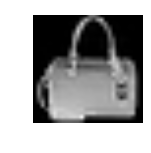

In [22]:
show_img(X_train[234].reshape(28, 28))

In [23]:
y_train = id_to_onehot(y_train, 10)
y_test = id_to_onehot(y_test, 10)

#### 2), build model 

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

In [31]:
m = Sequential()

m.add(Convolution2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

m.add(Convolution2D(filters=64, kernel_size=(2, 2), strides=(1, 1), padding='valid'))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

m.add(Flatten())
m.add(Dense(10))
m.add(BatchNormalization())
m.add(Activation('softmax'))

m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
batch_normalization_26 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 27, 27, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
batch_normalization_27 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
activation_27 (Activation)   (None, 12, 12, 64)        0         
__________

In [32]:
m.compile(optimizer='Adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [34]:
m.fit(X_train,
      y_train,
      validation_data=(X_test, y_test),
      batch_size=10,
      epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s - loss: 0.3560 - acc: 0.8838 - val_loss: 0.2763 - val_acc: 0.9007
Epoch 2/10
60000/60000 [==============================] - 42s - loss: 0.3280 - acc: 0.8936 - val_loss: 0.2566 - val_acc: 0.9098
Epoch 3/10
60000/60000 [==============================] - 43s - loss: 0.3112 - acc: 0.8981 - val_loss: 0.2518 - val_acc: 0.9126
Epoch 4/10
60000/60000 [==============================] - 43s - loss: 0.3039 - acc: 0.9009 - val_loss: 0.2463 - val_acc: 0.9129
Epoch 5/10
60000/60000 [==============================] - 43s - loss: 0.2998 - acc: 0.9014 - val_loss: 0.2577 - val_acc: 0.9134
Epoch 6/10
60000/60000 [==============================] - 43s - loss: 0.2860 - acc: 0.9078 - val_loss: 0.2463 - val_acc: 0.9161
Epoch 7/10
60000/60000 [==============================] - 43s - loss: 0.2827 - acc: 0.9063 - val_loss: 0.2475 - val_acc: 0.9143
Epoch 8/10
60000/60000 [==============================

In [35]:
evaluation_test = m.evaluate(X_train, y_train, verbose=0)

In [36]:
print('loss: {0}, accuracy: {1}'.format(evaluation_test[0], evaluation_test[1]))

loss: 0.1520828681305051, accuracy: 0.9452


#### 2a), let's use ResNet50

In [57]:
import cv2
from keras.applications.resnet50 import ResNet50

In [ ]:
#resize image
cv2.resize()

In [47]:
#reshape data into 3-channel tensor
train_X_3d = train_X.reshape((train_X.shape[0], 28, 28, 1)) * np.ones(3, dtype=np.float32)[None, None, None, :]

In [54]:
rm = ResNet50(input_shape=(197, 197, 3), 
              classes=10, 
              weights=None, 
              include_top=False)

rm.summary()

ValueError: Input size must be at least 197x197, got `input_shape=(28, 28, 3)`

#### 3), have fun with our softmax model implemented with numpy

In [37]:
feature_count = 28 * 28
sample_count = X_train.shape[0]

train_X = X_train.reshape((sample_count, feature_count))
test_X = X_test.reshape((X_test.shape[0], feature_count))

In [38]:
epochs = 100
batch_size=20
step = 10

W, b = ml.create_parameters(feature_count, 10)

In [39]:
for epoch in range(0, epochs):

    batch_start = 0    
    while(batch_start + batch_size < sample_count):
        batch_X = train_X[batch_start:batch_start+batch_size,:]
        batch_y = y_train[batch_start:batch_start+batch_size,:] 
        h = ml.softmax_regression_model(batch_X, W, b)
        dW, db = ml.crossentropy_cost_dev(batch_X, batch_y, h)
        W, b = ml.gd_update(W, b, dW, db, lr=0.01)
        batch_start += batch_size

    if (epoch + 1) % step == 0:
        h = ml.softmax_regression_model(train_X, W, b)
        cost = ml.crossentropy_cost(h, y_train)
        acc = ml.categorical_accuracy(h, y_train)
        print("epoch {0}, cost {1}, acc {2}".format(epoch + 1, cost, acc))

print("training finished.")        
        
h = ml.softmax_regression_model(train_X, W, b)
cost = ml.crossentropy_cost(h, y_train)
acc = ml.categorical_accuracy(h, y_train)
print("final cost {0}, acc {1}".format(cost, acc))

h = ml.softmax_regression_model(test_X, W, b)
cost = ml.crossentropy_cost(h, y_test)
acc = ml.categorical_accuracy(h, y_test)
print("test cost {0}, acc {1}".format(cost, acc))

epoch 10, cost 0.09119493406200503, acc 0.7713333333333333
epoch 20, cost 0.07384588485744492, acc 0.7983
epoch 30, cost 0.06548564852534794, acc 0.8121
epoch 40, cost 0.06027913865292422, acc 0.82045
epoch 50, cost 0.056615567307002734, acc 0.8271166666666666
epoch 60, cost 0.05384892012732094, acc 0.8324166666666667
epoch 70, cost 0.0516660877644781, acc 0.8360666666666666
epoch 80, cost 0.04989212593012495, acc 0.8398666666666667
epoch 90, cost 0.04841893529651631, acc 0.8428
epoch 100, cost 0.04717511573885371, acc 0.8458333333333333
training finished.
final cost 0.04717511573885371, acc 0.8458333333333333
test cost 0.055191518140006834, acc 0.8293
